In [1]:
!pip install sparqlwrapper

In [2]:
import sys
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# SPARQL Query
query = """
SELECT DISTINCT ?game ?gameLabel ?image
WHERE {
  ?game wdt:P31/wdt:P279* wd:Q7889.  # Sélectionne les jeux vidéo
  ?game wdt:P18 ?image.              # Récupère les images associées
  FILTER (STRENDS(LCASE(STR(?image)), ".jpg"))  # Garde uniquement les fichiers PNG
  SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }  # Récupère les labels en français
}
LIMIT 150
"""

def get_results(endpoint_url, query):
    """ Exécute la requête SPARQL et retourne les résultats en JSON """
    try:
        user_agent = "WDQS-example Python/%s.%s" % (
            sys.version_info[0],
            sys.version_info[1],
        )
        sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        return sparql.query().convert()
    except Exception as e:
        print(f"\u274c Erreur lors de la requête SPARQL : {e}")
        return None

# Exécuter la requête
results = get_results(endpoint_url, query)

# Stocker les résultats dans un tableau
if results:
    data = []
    for result in results["results"]["bindings"]:
        game = result["game"]["value"] if "game" in result else "N/A"
        label = result["gameLabel"]["value"] if "gameLabel" in result else "N/A"
        image = result["image"]["value"] if "image" in result else "N/A"
        data.append((game, label, image))

    # Convertir en DataFrame Pandas
    df = pd.DataFrame(data, columns=["Game", "Label", "Image"])
    print(df.head())  # Afficher les 5 premières lignes du DataFrame
    
array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["game"]["value"],
            result["gameLabel"]["value"],
            result["image"]["value"],
        )
    )


                                     Game           Label  \
0  http://www.wikidata.org/entity/Q177491        Breakout   
1  http://www.wikidata.org/entity/Q349413       Homefront   
2  http://www.wikidata.org/entity/Q216293            Pong   
3  http://www.wikidata.org/entity/Q216995  Super Mario 64   
4  http://www.wikidata.org/entity/Q264678          X-Moto   

                                               Image  
0  http://commons.wikimedia.org/wiki/Special:File...  
1  http://commons.wikimedia.org/wiki/Special:File...  
2  http://commons.wikimedia.org/wiki/Special:File...  
3  http://commons.wikimedia.org/wiki/Special:File...  
4  http://commons.wikimedia.org/wiki/Special:File...  


In [3]:
dataframe = pd.DataFrame(array, columns=["Game", "Label", "Image"])
dataframe = dataframe.astype(
    dtype={"Game": "<U200", "Label": "<U200", "Image": "<U200"}
)
dataframe

,Game,Label,Image
0,http://www.wikidata.org/entity/Q177491,Breakout,http://commons.wikimedia.org/wiki/Special:File...
1,http://www.wikidata.org/entity/Q349413,Homefront,http://commons.wikimedia.org/wiki/Special:File...
2,http://www.wikidata.org/entity/Q216293,Pong,http://commons.wikimedia.org/wiki/Special:File...
3,http://www.wikidata.org/entity/Q216995,Super Mario 64,http://commons.wikimedia.org/wiki/Special:File...
4,http://www.wikidata.org/entity/Q264678,X-Moto,http://commons.wikimedia.org/wiki/Special:File...
...,...,...,...
145,http://www.wikidata.org/entity/Q131406722,Q131406722,http://commons.wikimedia.org/wiki/Special:File...
146,http://www.wikidata.org/entity/Q131406722,Q131406722,http://commons.wikimedia.org/wiki/Special:File...
147,http://www.wikidata.org/entity/Q131406722,Q131406722,http://commons.wikimedia.org/wiki/Special:File...
148,http://www.wikidata.org/entity/Q930283,EcoQuest 2 : SOS Forêt vierge,http://commons.wikimedia.org/wiki/Special:File...


In [4]:
import requests
import shutil
import os

def download_image(url, save_path="images"):
    """
    Télécharge une image depuis une URL et l'enregistre dans le dossier spécifié.
    
    :param url: URL de l'image à télécharger
    :param save_path: Dossier où enregistrer l'image (par défaut "images")
    :return: Chemin du fichier téléchargé si succès, None sinon
    """
    headers = {"User-Agent": "Mozilla/5.0"}
    
    # Requête pour récupérer l'image
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)

    if request.status_code == 200:
        # Crée le dossier s'il n'existe pas
        os.makedirs(save_path, exist_ok=True)

        # Récupère le nom de fichier depuis l'URL
        filename = os.path.basename(url)
        file_path = os.path.join(save_path, filename)

        # Sauvegarde l'image
        with open(file_path, "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
        
        print(f"✅ Image téléchargée : {file_path}")
        return file_path  # Retourne le chemin de l'image sauvegardée

    print(f"❌ Échec du téléchargement : {url}")
    return None  # Retourne None en cas d'échec



In [5]:

# Télécharger les images et stocker les chemins dans une nouvelle colonne
dataframe["downloaded_image"] = dataframe["Image"].apply(lambda url: download_image(url))



✅ Image téléchargée : images\Screenshot-LBreakout2.jpg
✅ Image téléchargée : images\E3%202010%20Homefront%20booth.jpg
✅ Image téléchargée : images\Signed%20Pong%20Cabinet.jpg
✅ Image téléchargée : images\N64%20Clear%20Blue%20with%20Super%20Mario%2064%2020100603.jpg
✅ Image téléchargée : images\Xmoto1.jpg
✅ Image téléchargée : images\The%20Ball%20-%20Screenshot%2002.jpg
✅ Image téléchargée : images\FreeCol0%205%202%20mapboard.jpg
✅ Image téléchargée : images\You%20are%20standing.jpg
✅ Image téléchargée : images\EVE%20Online%20-%20Caldari%20Freighters.jpg
✅ Image téléchargée : images\.kkrieger%203.jpg
✅ Image téléchargée : images\Trine%20-%20Wizard%20Lift.jpg
✅ Image téléchargée : images\Stalkershot%202.jpg
✅ Image téléchargée : images\Xblast.jpg
✅ Image téléchargée : images\CBM64CartridgeRadarRatRace.JPG
✅ Image téléchargée : images\Mus%C3%A9e%20M%C3%A9canique%20205.JPG
✅ Image téléchargée : images\Game%26watch-donkey-kong-3.jpg
✅ Image téléchargée : images\Rockstar%20Games%20buses%20at

In [6]:

def count_files_in_folder(folder_path):
    try:
        return len(os.listdir(folder_path))  # Compte tous les fichiers et dossiers
    except FileNotFoundError:
        print("❌ Le dossier n'existe pas.")
        return 0

# Exemple d'utilisation
folder = "images"  # Remplace par ton dossier
count = count_files_in_folder(folder)
print(f"📂 Le dossier '{folder}' contient {count} éléments.")


📂 Le dossier 'images' contient 149 éléments.


In [7]:
pip install pillow exifread


Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS

# Définir le chemin du dossier contenant les images
image_folder = "images/"  # Modifiez ce chemin si nécessaire

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff', '.bmp', '.png'))]

# Liste pour stocker les données EXIF
exif_data_list = []

# Parcourir chaque image et extraire les métadonnées EXIF
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        exif_data = img._getexif()
        
        # Dictionnaire pour stocker les métadonnées de cette image
        image_exif_dict = {'Filename': image_file}
        
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, f"Tag_{tag}")  # Convertir le tag en nom lisible
                image_exif_dict[tag_name] = value
        
        exif_data_list.append(image_exif_dict)
    except Exception as e:
        print(f"Erreur lors du traitement de {image_file}: {e}")

# Création du DataFrame
df_exif = pd.DataFrame(exif_data_list)

# Afficher le DataFrame
print(df_exif)

# Sauvegarder les métadonnées EXIF dans un fichier CSV
df_exif.to_csv("exif_metadata.csv", index=False)


                                              Filename  ResolutionUnit  \
0    %E3%83%90%E3%83%AB%E3%83%BC%E3%83%B3%E3%83%95%...             2.0   
1                                    .kkrieger%203.jpg             NaN   
2                                   20070701204238.jpg             NaN   
3              314th%20Fighter%20Squadron%20emblem.jpg             2.0   
4                Ace%20Combat%206%20-%20Ace%20Edge.jpg             NaN   
..                                                 ...             ...   
143                                         Wiifit.jpg             NaN   
144                                         Xblast.jpg             2.0   
145                                         Xmoto1.jpg             NaN   
146                                   Yo%20Frankie.jpg             2.0   
147                           You%20are%20standing.jpg             NaN   

     ExifOffset  YCbCrPositioning XResolution YResolution ExifVersion  \
0          90.0               1.0     

In [9]:
import os
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS

# Définir le chemin du dossier contenant les images
image_folder = "images/"  # Modifiez ce chemin si nécessaire

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

# Liste pour stocker les données EXIF
exif_data_list = []

# Parcourir chaque image et extraire les métadonnées EXIF
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        exif_data = img._getexif()
        
        # Dictionnaire pour stocker les métadonnées de cette image
        image_exif_dict = {'Filename': image_file}
        
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, f"Tag_{tag}")  # Convertir le tag en nom lisible
                image_exif_dict[tag_name] = value
        
        exif_data_list.append(image_exif_dict)
    except Exception as e:
        print(f"Erreur lors du traitement de {image_file}: {e}")

# Création du DataFrame
df_exif = pd.DataFrame(exif_data_list)

# Filtrer les lignes en excluant celles ayant une majorité de valeurs NaN
threshold = 0.5  # Seuil : une ligne est exclue si plus de 50% de ses valeurs sont NaN
df_filtered = df_exif.dropna(thresh=int(threshold * df_exif.shape[1]))

# Afficher le DataFrame filtré
print(df_filtered)

# Sauvegarder les métadonnées EXIF filtrées dans un fichier CSV
df_filtered.to_csv("exif_metadata_filtered.csv", index=False)


                                              Filename  ResolutionUnit  \
8    Atari%20Adventure%20Easter%20Egg%20on%20Atari%...             2.0   
20                                     DemonAttack.jpg             2.0   
21                Deskohran%C3%AD%2008-10-05%20070.jpg             2.0   
30                    Duo%20playing%20Wii%20Sports.jpg             2.0   
32   EB%20Games%20Expo%202015%20-%20Super%20Smash%2...             2.0   
46   H.R.%20Giger%E2%80%99s%20Xenomorph%20%28Ank%20...             2.0   
51                                 Kitty%20Glitter.jpg             2.0   
57   Midway%20%28USA%29%20Galaxian%20arcade%20machi...             2.0   
60               Mus%C3%A9e%20M%C3%A9canique%20017.JPG             2.0   
61               Mus%C3%A9e%20M%C3%A9canique%20029.JPG             2.0   
62               Mus%C3%A9e%20M%C3%A9canique%20185.JPG             2.0   
63               Mus%C3%A9e%20M%C3%A9canique%20188.JPG             2.0   
64               Mus%C3%A9e%20M%C3%A9c

In [10]:
import os
import json
from PIL import Image
from PIL.ExifTags import TAGS

# Définir le chemin du dossier contenant les images
image_folder = "images/"  # Modifiez ce chemin selon votre dossier

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff', '.bmp', '.gif'))]

# Liste pour stocker les données EXIF
exif_data_list = []

# Fonction pour convertir des valeurs EXIF en types sérialisables JSON
def convert_exif_value(value):
    if isinstance(value, bytes):
        try:
            return value.decode('utf-8', errors='ignore')
        except Exception:
            return str(value)
    elif isinstance(value, tuple):  # Convertir tuple en liste
        return list(value)
    elif isinstance(value, Image.Exif.IFDRational):  # Convertir IFDRational en float
        return float(value)
    return value

# Fonction pour déterminer l'orientation de l'image
def get_orientation(width, height):
    if width > height:
        return "Paysage"
    elif width < height:
        return "Portrait"
    else:
        return "Carré"

# Extraction des métadonnées de chaque image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        width, height = img.size  # Taille de l'image
        format_image = img.format  # Format de l'image

        # Métadonnées EXIF
        exif_data = img._getexif()
        image_exif_dict = {
            "Nom du fichier": image_file,
            "Taille": f"{width}x{height}",
            "Format": format_image,
            "Orientation": get_orientation(width, height)
        }
        
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, f"Tag_{tag}")
                image_exif_dict[tag_name] = convert_exif_value(value)
        
        # Ajout au JSON final
        exif_data_list.append(image_exif_dict)

    except Exception as e:
        print(f"Erreur lors du traitement de {image_file}: {e}")

# Sauvegarde des métadonnées dans un fichier JSON
json_output_path = "exif_metadata.json"

with open(json_output_path, "w", encoding="utf-8") as json_file:
    json.dump(exif_data_list, json_file, indent=4, ensure_ascii=False)

print(f"Fichier JSON sauvegardé sous : {json_output_path}")


Erreur lors du traitement de %E3%83%90%E3%83%AB%E3%83%BC%E3%83%B3%E3%83%95%E3%82%A1%E3%82%A4%E3%83%88%20%E3%83%AD%E3%82%B4.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de 314th%20Fighter%20Squadron%20emblem.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Ace%20Combat%206%20-%20Ace%20Edge.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de App-augmented-reality-game-gps-163042.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Assassin%27s%20Creed%20II%20by%20Reindertot.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Atari%20Adventure%20Easter%20Egg%20on%20Atari%20%28Jakks%20Pacific%29%20Port.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Bubble%20Bobble%20arcade%20machine.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Cartucho%20de%20Atari%202

In [11]:
import os
import json
import numpy as np
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

# 📂 Chemins des fichiers
image_folder = "images"
json_file_path = "exif_metadata.json"

# 📖 Charger le fichier JSON existant
with open(json_file_path, "r", encoding="utf-8") as file:
    metadata = json.load(file)

# 🔄 Créer un set des images présentes dans le JSON
json_images = {img_data["Nom du fichier"] for img_data in metadata}

# 🔄 Lister les images du dossier qui existent aussi dans le JSON
image_files = [f for f in os.listdir(image_folder) if f in json_images]

# 🔍 Traiter chaque image du dossier SI ELLE EXISTE DANS LE JSON
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    print(f"\n🔍 Analyse de l'image : {img_name}")

    # 📸 Ouvrir l'image et la convertir en tableau numpy
    img = Image.open(img_path).convert("RGB")
    img_array = np.array(img).reshape(-1, 3)  # Transformer en liste de pixels (RGB)

    # 🎯 Appliquer K-Means pour trouver les 5 couleurs dominantes
    cluster_count = 3
    kmeans = MiniBatchKMeans(n_clusters=cluster_count, n_init=10, random_state=0)
    kmeans.fit(img_array)
    # Récupérer les couleurs des clusters
    cluster_centers = kmeans.cluster_centers_.astype(int)
    
    # Obtenir les labels des pixels
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    
    # Trier les clusters par fréquence d'apparition (du plus fréquent au moins fréquent)
    sorted_indices = np.argsort(-counts)  # Trie en ordre décroissant
    
    # Réorganiser les couleurs et les fréquences selon ce tri
    sorted_cluster_centers = cluster_centers[sorted_indices]
    sorted_colors = [tuple(color) for color in sorted_cluster_centers]    
    # Afficher les résultats
    print("Couleurs triées (RGB) :", [tuple(color) for color in sorted_cluster_centers])
   # print("Nombre de pixels par cluster :", sorted_counts)
    print(sorted_colors[0])

    # 🔝 Conserver le format RGB sous forme de tuples
    rgb_colors = [tuple(color) for color in cluster_centers]
    
    # 🔄 Mettre à jour le JSON avec les couleurs
    for img_data in metadata:
        if img_data["Nom du fichier"] == img_name:
            img_data["dominant_colors"] = f"{sorted_colors[0][0]} {sorted_colors[0][1]} {sorted_colors[0][2]}"
            break  # Une fois mis à jour, on passe à l'image suivante

    # 🎨 Afficher la couleur la plus dominante
    print(f"🌟 Couleur principale : {rgb_colors}")

# 💾 Sauvegarder le JSON mis à jour
with open(json_file_path, "w", encoding="utf-8") as file:
    json.dump(metadata, file, indent=4, ensure_ascii=False)

print("✅ Mise à jour du JSON terminée !")



🔍 Analyse de l'image : .kkrieger%203.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(31, 30, 26), (120, 106, 83), (241, 228, 190)]
(31, 30, 26)
🌟 Couleur principale : [(241, 228, 190), (31, 30, 26), (120, 106, 83)]

🔍 Analyse de l'image : 20070701204238.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(49, 46, 40), (197, 174, 164), (129, 110, 91)]
(49, 46, 40)
🌟 Couleur principale : [(49, 46, 40), (197, 174, 164), (129, 110, 91)]

🔍 Analyse de l'image : Armagetron.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(29, 55, 25), (80, 77, 38), (132, 161, 103)]
(29, 55, 25)
🌟 Couleur principale : [(80, 77, 38), (29, 55, 25), (132, 161, 103)]

🔍 Analyse de l'image : Cpc464.computer.750pix.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(41, 35, 30), (154, 89, 49), (222, 209, 191)]
(41, 35, 30)
🌟 Couleur principale : [(41, 35, 30), (222, 209, 191), (154, 89, 49)]

🔍 Analyse de l'image : DARIUS.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(31, 16, 15), (187, 55, 36), (161, 173, 155)]
(31, 16, 15)
🌟 Couleur principale : [(31, 16, 15), (161, 173, 155), (187, 55, 36)]

🔍 Analyse de l'image : Daytonausa2.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(23, 20, 19), (153, 142, 90), (241, 241, 238)]
(23, 20, 19)
🌟 Couleur principale : [(23, 20, 19), (241, 241, 238), (153, 142, 90)]

🔍 Analyse de l'image : December%201975%20advertisement%20for%20Gun%20Fight%20by%20Midway.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(237, 237, 237), (163, 163, 163), (59, 59, 59)]
(237, 237, 237)
🌟 Couleur principale : [(59, 59, 59), (237, 237, 237), (163, 163, 163)]

🔍 Analyse de l'image : Digger.JPG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(123, 9, 4), (130, 72, 13), (4, 3, 2)]
(123, 9, 4)
🌟 Couleur principale : [(4, 3, 2), (130, 72, 13), (123, 9, 4)]

🔍 Analyse de l'image : Doom%20Utilities%20%28Back%20Cover%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(108, 46, 88), (98, 47, 67), (147, 104, 107)]
(108, 46, 88)
🌟 Couleur principale : [(108, 46, 88), (147, 104, 107), (98, 47, 67)]

🔍 Analyse de l'image : Doom%20Utilities%20%28Front%20Cover%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(120, 58, 104), (112, 51, 93), (163, 145, 108)]
(120, 58, 104)
🌟 Couleur principale : [(120, 58, 104), (163, 145, 108), (112, 51, 93)]

🔍 Analyse de l'image : Doom%20Utilities%20%28Inside%20Cover%20Left%20Inlay%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(250, 249, 245), (33, 33, 32), (153, 153, 151)]
(250, 249, 245)
🌟 Couleur principale : [(250, 249, 245), (33, 33, 32), (153, 153, 151)]

🔍 Analyse de l'image : Doom%20Utilities%20%28Media%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(124, 115, 107), (32, 32, 29), (254, 254, 254)]
(124, 115, 107)
🌟 Couleur principale : [(124, 115, 107), (254, 254, 254), (32, 32, 29)]

🔍 Analyse de l'image : Doom%20Utilities%20%28Spine-Sides%20Left%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(107, 45, 82), (139, 109, 79), (179, 145, 138)]
(107, 45, 82)
🌟 Couleur principale : [(139, 109, 79), (107, 45, 82), (179, 145, 138)]

🔍 Analyse de l'image : Doom%20Utilities%20%28Spine-Sides%20Right%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(114, 45, 86), (145, 113, 81), (105, 55, 58)]
(114, 45, 86)
🌟 Couleur principale : [(114, 45, 86), (145, 113, 81), (105, 55, 58)]

🔍 Analyse de l'image : DP%20Paintball%202.0%20menu%20-%20main.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(55, 56, 68), (42, 42, 53), (233, 233, 236)]
(55, 56, 68)
🌟 Couleur principale : [(42, 42, 53), (233, 233, 236), (55, 56, 68)]

🔍 Analyse de l'image : Epiphany%20game%20screenshot.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(159, 159, 159), (78, 110, 72), (20, 3, 4)]
(159, 159, 159)
🌟 Couleur principale : [(20, 3, 4), (159, 159, 159), (78, 110, 72)]

🔍 Analyse de l'image : EVE%20Online%20-%20Caldari%20Freighters.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(28, 30, 28), (58, 71, 71), (131, 166, 168)]
(28, 30, 28)
🌟 Couleur principale : [(58, 71, 71), (131, 166, 168), (28, 30, 28)]

🔍 Analyse de l'image : Flight%20of%20the%20Amazon%20Queen.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(108, 93, 105), (48, 31, 37), (170, 168, 171)]
(108, 93, 105)
🌟 Couleur principale : [(48, 31, 37), (170, 168, 171), (108, 93, 105)]

🔍 Analyse de l'image : Freddy%20Pharkas%20Frontier%20Pharmacist.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(65, 36, 25), (123, 100, 102), (224, 168, 143)]
(65, 36, 25)
🌟 Couleur principale : [(123, 100, 102), (65, 36, 25), (224, 168, 143)]

🔍 Analyse de l'image : FreeCol0%205%202%20mapboard.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(195, 187, 110), (63, 125, 164), (73, 66, 34)]
(195, 187, 110)
🌟 Couleur principale : [(195, 187, 110), (63, 125, 164), (73, 66, 34)]

🔍 Analyse de l'image : Glest.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(43, 56, 12), (107, 86, 37), (232, 212, 68)]
(43, 56, 12)
🌟 Couleur principale : [(43, 56, 12), (232, 212, 68), (107, 86, 37)]

🔍 Analyse de l'image : Killing%20Floor%20Biohazard1.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(33, 29, 15), (74, 56, 27), (142, 93, 35)]
(33, 29, 15)
🌟 Couleur principale : [(33, 29, 15), (142, 93, 35), (74, 56, 27)]

🔍 Analyse de l'image : Mastermind.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(177, 156, 117), (253, 254, 253), (82, 43, 26)]
(177, 156, 117)
🌟 Couleur principale : [(177, 156, 117), (253, 254, 253), (82, 43, 26)]

🔍 Analyse de l'image : Maze%20war.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(112, 117, 105), (29, 35, 34), (190, 201, 179)]
(112, 117, 105)
🌟 Couleur principale : [(112, 117, 105), (190, 201, 179), (29, 35, 34)]

🔍 Analyse de l'image : Nexuiz%20screenshot%2008.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(35, 34, 25), (149, 123, 73), (251, 250, 209)]
(35, 34, 25)
🌟 Couleur principale : [(149, 123, 73), (35, 34, 25), (251, 250, 209)]

🔍 Analyse de l'image : Niveau%20de%20Blocks%20That%20Matter.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(55, 40, 21), (120, 80, 41), (122, 141, 46)]
(55, 40, 21)
🌟 Couleur principale : [(122, 141, 46), (55, 40, 21), (120, 80, 41)]

🔍 Analyse de l'image : On-Line%20Systems%20-%20Time%20Zone.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(15, 28, 14), (98, 111, 92), (198, 195, 147)]
(15, 28, 14)
🌟 Couleur principale : [(15, 28, 14), (198, 195, 147), (98, 111, 92)]

🔍 Analyse de l'image : On-Line-Systems-00-Mission-Asteroid.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(10, 10, 10), (144, 163, 177), (189, 108, 83)]
(10, 10, 10)
🌟 Couleur principale : [(144, 163, 177), (10, 10, 10), (189, 108, 83)]

🔍 Analyse de l'image : OpenArena-Gargoyle.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(23, 13, 3), (83, 33, 8), (199, 58, 17)]
(23, 13, 3)
🌟 Couleur principale : [(23, 13, 3), (199, 58, 17), (83, 33, 8)]

🔍 Analyse de l'image : P-38%202.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(173, 173, 173), (213, 213, 213), (94, 94, 94)]
(173, 173, 173)
🌟 Couleur principale : [(173, 173, 173), (94, 94, 94), (213, 213, 213)]

🔍 Analyse de l'image : ParaParaParadise%202ndMIX.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(125, 111, 124), (34, 29, 36), (212, 194, 198)]
(125, 111, 124)
🌟 Couleur principale : [(125, 111, 124), (34, 29, 36), (212, 194, 198)]

🔍 Analyse de l'image : Phoenix-1980-italy.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(28, 30, 28), (138, 128, 96), (222, 220, 214)]
(28, 30, 28)
🌟 Couleur principale : [(138, 128, 96), (28, 30, 28), (222, 220, 214)]

🔍 Analyse de l'image : Pump%20it%20up%20cosplay%201.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(93, 72, 77), (146, 143, 147), (35, 32, 33)]
(93, 72, 77)
🌟 Couleur principale : [(146, 143, 147), (35, 32, 33), (93, 72, 77)]

🔍 Analyse de l'image : R-Type%20video%20game%20machine.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(19, 48, 26), (16, 118, 57), (9, 236, 111)]
(19, 48, 26)
🌟 Couleur principale : [(9, 236, 111), (19, 48, 26), (16, 118, 57)]

🔍 Analyse de l'image : Rallycross%20blackwood%20lfs.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(69, 64, 50), (34, 36, 28), (100, 92, 75)]
(69, 64, 50)
🌟 Couleur principale : [(100, 92, 75), (34, 36, 28), (69, 64, 50)]

🔍 Analyse de l'image : S.T.A.L.K.E.R.-%20Call%20of%20Pripyat%2C%20DirectX%2011%20screenshot.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(27, 20, 14), (82, 74, 66), (130, 124, 119)]
(27, 20, 14)
🌟 Couleur principale : [(82, 74, 66), (27, 20, 14), (130, 124, 119)]

🔍 Analyse de l'image : Screenshot%20of%20MegaGlest%20Gameplay.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(143, 102, 56), (159, 144, 126), (64, 48, 29)]
(143, 102, 56)
🌟 Couleur principale : [(64, 48, 29), (143, 102, 56), (159, 144, 126)]

🔍 Analyse de l'image : Screenshot%20Paradroid%20GNU.JPG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(104, 103, 105), (9, 7, 14), (252, 252, 252)]
(104, 103, 105)
🌟 Couleur principale : [(104, 103, 105), (252, 252, 252), (9, 7, 14)]

🔍 Analyse de l'image : Screenshot-LBreakout2.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(139, 141, 88), (184, 186, 156), (54, 49, 42)]
(139, 141, 88)
🌟 Couleur principale : [(184, 186, 156), (54, 49, 42), (139, 141, 88)]

🔍 Analyse de l'image : Second%20Life%2011th%20Birthday%20Live%20Drax%20Files%20Radio%20Hour.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(92, 86, 81), (42, 40, 34), (119, 123, 131)]
(92, 86, 81)
🌟 Couleur principale : [(42, 40, 34), (92, 86, 81), (119, 123, 131)]

🔍 Analyse de l'image : SierraOnLine-Box-ColonelsBequest.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 1), (100, 175, 202), (238, 54, 25)]
(0, 0, 1)
🌟 Couleur principale : [(0, 0, 1), (100, 175, 202), (238, 54, 25)]

🔍 Analyse de l'image : SierraOnLine-Box-DaggerofAmonRa.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(18, 27, 20), (136, 104, 81), (242, 164, 105)]
(18, 27, 20)
🌟 Couleur principale : [(242, 164, 105), (18, 27, 20), (136, 104, 81)]

🔍 Analyse de l'image : SierraOnLine-Box-KingsQuest1.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(143, 128, 77), (39, 49, 52), (141, 149, 170)]
(143, 128, 77)
🌟 Couleur principale : [(39, 49, 52), (141, 149, 170), (143, 128, 77)]

🔍 Analyse de l'image : SierraOnLine-Box-KingsQuest2.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(139, 104, 92), (68, 54, 62), (183, 174, 168)]
(139, 104, 92)
🌟 Couleur principale : [(183, 174, 168), (68, 54, 62), (139, 104, 92)]

🔍 Analyse de l'image : SierraOnLine-Box-KingsQuest4.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(155, 104, 76), (54, 27, 21), (212, 177, 168)]
(155, 104, 76)
🌟 Couleur principale : [(155, 104, 76), (54, 27, 21), (212, 177, 168)]

🔍 Analyse de l'image : SierraOnLine-Box-KingsQuest5.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(131, 159, 166), (205, 190, 178), (61, 49, 24)]
(131, 159, 166)
🌟 Couleur principale : [(131, 159, 166), (61, 49, 24), (205, 190, 178)]

🔍 Analyse de l'image : SierraOnLine-Box-KingsQuest6.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(2, 4, 5), (76, 55, 53), (179, 127, 88)]
(2, 4, 5)
🌟 Couleur principale : [(76, 55, 53), (179, 127, 88), (2, 4, 5)]

🔍 Analyse de l'image : SierraOnLine-Box-LostSecretoftheRainforest.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(176, 144, 129), (84, 91, 70), (251, 230, 207)]
(176, 144, 129)
🌟 Couleur principale : [(84, 91, 70), (176, 144, 129), (251, 230, 207)]

🔍 Analyse de l'image : SierraOnLine-Box-QuestforGlory.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(68, 45, 41), (175, 117, 105), (240, 209, 191)]
(68, 45, 41)
🌟 Couleur principale : [(68, 45, 41), (240, 209, 191), (175, 117, 105)]

🔍 Analyse de l'image : SierraOnLine-Box-RobertaWilliamsCollection.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(10, 8, 10), (118, 55, 45), (211, 157, 98)]
(10, 8, 10)
🌟 Couleur principale : [(10, 8, 10), (118, 55, 45), (211, 157, 98)]

🔍 Analyse de l'image : Space%20Invaders.JPG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(49, 19, 6), (156, 71, 18), (181, 139, 97)]
(49, 19, 6)
🌟 Couleur principale : [(156, 71, 18), (49, 19, 6), (181, 139, 97)]

🔍 Analyse de l'image : Spaceharrier.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(26, 19, 12), (133, 87, 26), (176, 221, 216)]
(26, 19, 12)
🌟 Couleur principale : [(26, 19, 12), (133, 87, 26), (176, 221, 216)]

🔍 Analyse de l'image : Stalker%20Clear%20Sky%20screenshot%20god%20rays%2001.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(17, 14, 11), (76, 57, 40), (194, 175, 165)]
(17, 14, 11)
🌟 Couleur principale : [(76, 57, 40), (17, 14, 11), (194, 175, 165)]

🔍 Analyse de l'image : Stalkershot%202.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(37, 33, 34), (96, 85, 85), (172, 182, 218)]
(37, 33, 34)
🌟 Couleur principale : [(37, 33, 34), (172, 182, 218), (96, 85, 85)]

🔍 Analyse de l'image : Streetfighter%20Console.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(23, 12, 11), (163, 142, 75), (23, 66, 116)]
(23, 12, 11)
🌟 Couleur principale : [(23, 66, 116), (163, 142, 75), (23, 12, 11)]

🔍 Analyse de l'image : Taito%20Operation%20Thunderbolt.JPG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(25, 23, 27), (122, 112, 101), (196, 174, 148)]
(25, 23, 27)
🌟 Couleur principale : [(122, 112, 101), (25, 23, 27), (196, 174, 148)]

🔍 Analyse de l'image : Torcs-20081217104851.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(65, 63, 60), (17, 25, 21), (179, 189, 204)]
(65, 63, 60)
🌟 Couleur principale : [(65, 63, 60), (179, 189, 204), (17, 25, 21)]

🔍 Analyse de l'image : Trine%20-%20Wizard%20Lift.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(24, 18, 46), (189, 132, 78), (69, 91, 151)]
(24, 18, 46)
🌟 Couleur principale : [(24, 18, 46), (189, 132, 78), (69, 91, 151)]

🔍 Analyse de l'image : TuxRacerScreenshot.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(234, 236, 252), (158, 167, 203), (73, 93, 118)]
(234, 236, 252)
🌟 Couleur principale : [(73, 93, 118), (234, 236, 252), (158, 167, 203)]

🔍 Analyse de l'image : TV%20Sports%20-%20Football%20-%201989%20NFL%20Season%20%28Back%20Cover%29.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(168, 183, 123), (122, 130, 99), (50, 55, 40)]
(168, 183, 123)
🌟 Couleur principale : [(168, 183, 123), (50, 55, 40), (122, 130, 99)]

🔍 Analyse de l'image : UFO%20Alien%20Invasion%200.12%20-%20geoscape.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(11, 19, 30), (111, 109, 90), (237, 236, 229)]
(11, 19, 30)
🌟 Couleur principale : [(11, 19, 30), (237, 236, 229), (111, 109, 90)]

🔍 Analyse de l'image : UFO%20screenshot%201.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(22, 29, 27), (100, 78, 69), (208, 133, 76)]
(22, 29, 27)
🌟 Couleur principale : [(22, 29, 27), (100, 78, 69), (208, 133, 76)]

🔍 Analyse de l'image : VectrexRG2010.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(16, 15, 16), (51, 42, 36), (138, 62, 45)]
(16, 15, 16)
🌟 Couleur principale : [(16, 15, 16), (138, 62, 45), (51, 42, 36)]

🔍 Analyse de l'image : Vsdrmario.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(26, 27, 27), (81, 119, 132), (191, 182, 165)]
(26, 27, 27)
🌟 Couleur principale : [(26, 27, 27), (81, 119, 132), (191, 182, 165)]

🔍 Analyse de l'image : Whac-A-Mole-Dog.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(69, 60, 51), (146, 152, 146), (200, 155, 33)]
(69, 60, 51)
🌟 Couleur principale : [(200, 155, 33), (69, 60, 51), (146, 152, 146)]

🔍 Analyse de l'image : Widelands-svn3311.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(43, 75, 19), (134, 136, 74), (36, 54, 125)]
(43, 75, 19)
🌟 Couleur principale : [(36, 54, 125), (43, 75, 19), (134, 136, 74)]

🔍 Analyse de l'image : Wiifit.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(52, 38, 25), (104, 86, 69), (176, 169, 150)]
(52, 38, 25)
🌟 Couleur principale : [(176, 169, 150), (52, 38, 25), (104, 86, 69)]

🔍 Analyse de l'image : Xmoto1.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(85, 150, 214), (143, 119, 82), (16, 36, 11)]
(85, 150, 214)
🌟 Couleur principale : [(85, 150, 214), (143, 119, 82), (16, 36, 11)]

🔍 Analyse de l'image : You%20are%20standing.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(18, 21, 20), (95, 115, 103), (179, 241, 231)]
(18, 21, 20)
🌟 Couleur principale : [(18, 21, 20), (95, 115, 103), (179, 241, 231)]
✅ Mise à jour du JSON terminée !


In [12]:
import os
from PIL import Image
from PIL.ExifTags import TAGS
from PIL import TiffImagePlugin

# Définir le dossier contenant les images
image_folder = "images"  # Modifiez ce chemin selon votre dossier

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image JPEG et TIFF dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff'))]

if not image_files:
    print("❌ Aucune image JPEG ou TIFF trouvée dans le dossier.")
    exit()

# Afficher la liste des images disponibles
print("\n📂 Images disponibles :")
for idx, img in enumerate(image_files, 1):
    print(f"{idx}. {img}")

# Demander à l'utilisateur de choisir une image
while True:
    try:
        choice = int(input("\nEntrez le numéro de l'image à modifier : ")) - 1
        if 0 <= choice < len(image_files):
            image_name = image_files[choice]
            break
        else:
            print("❌ Numéro invalide, essayez encore.")
    except ValueError:
        print("❌ Veuillez entrer un nombre.")

# Charger l'image sélectionnée
image_path = os.path.join(image_folder, image_name)
img = Image.open(image_path)

# Demander les tags à l'utilisateur
tags = input("\nEntrez les tags (séparés par des virgules) : ").strip()
if not tags:
    print("❌ Aucun tag fourni, opération annulée.")
    exit()

# Vérifier et récupérer les métadonnées EXIF existantes
if "exif" in img.info:
    exif_dict = img.getexif()
else:
    exif_dict = TiffImagePlugin.ImageFileDirectory_v2()

# Ajouter les tags sous forme de description
exif_dict[270] = tags  # 270 = ImageDescription en EXIF

# Convertir les EXIF en bytes
exif_bytes = exif_dict.tobytes()

# Sauvegarde en remplaçant l'image existante
img.save(image_path, exif=exif_bytes)
print(f"\n✅ Tags ajoutés avec succès à {image_name} !")



📂 Images disponibles :
1. %E3%83%90%E3%83%AB%E3%83%BC%E3%83%B3%E3%83%95%E3%82%A1%E3%82%A4%E3%83%88%20%E3%83%AD%E3%82%B4.jpg
2. .kkrieger%203.jpg
3. 20070701204238.jpg
4. 314th%20Fighter%20Squadron%20emblem.jpg
5. Ace%20Combat%206%20-%20Ace%20Edge.jpg
6. App-augmented-reality-game-gps-163042.jpg
7. Armagetron.jpg
8. Assassin%27s%20Creed%20II%20by%20Reindertot.jpg
9. Atari%20Adventure%20Easter%20Egg%20on%20Atari%20%28Jakks%20Pacific%29%20Port.jpg
10. Bubble%20Bobble%20arcade%20machine.jpg
11. Cartucho%20de%20Atari%202600%20del%20juego%20Pitfall.jpg
12. CBM64CartridgeRadarRatRace.JPG
13. Commodore%2064%20at%20Video%20Game%20Museum%20in%20Berlin%20%2845946155851%29.jpg
14. Cosplay%20de%20Zidane%20Tribal.jpg
15. Cpc464.computer.750pix.jpg
16. DARIUS.jpg
17. Darksiders%20II%20girls%20at%20E3%202012%20%287166549959%29.jpg
18. Daytonausa2.jpg
19. Dead%20Island%20at%20the%202011%20New%20York%20Comic%20Con%20%286254213788%29.jpg
20. December%201975%20advertisement%20for%20Gun%20Fight%20by%20Mid


Entrez le numéro de l'image à modifier :  37,57,78


❌ Veuillez entrer un nombre.



Entrez le numéro de l'image à modifier :  test


❌ Veuillez entrer un nombre.



Entrez le numéro de l'image à modifier :  45

Entrez les tags (séparés par des virgules) :  trse,blue



✅ Tags ajoutés avec succès à Gorf.JPG !


In [28]:
import os
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS


image_folder = "images"  # Modifiez ce chemin selon votre dossier

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image JPEG et TIFF dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff'))]

# Afficher la liste des images disponibles
print("\n📂 Images disponibles :")
for idx, img in enumerate(image_files, 1):
    print(f"{idx}. {img}")
    
# Liste pour stocker les données
data = []

# Extraction des tags de chaque image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        
        # Vérifier si l'image contient des métadonnées EXIF
        exif_data = img.getexif()
        image_tags = ""

        if exif_data:
            image_tags = exif_data.get(270, "")  # 270 = ImageDescription (où les tags sont stockés)

        # Ajouter les données à la liste
        data.append({"Nom du fichier": image_file, "Tags": image_tags})

    except Exception as e:
        print(f"❌ Erreur lors du traitement de {image_file}: {e}")

# Création du DataFrame
df_tags = pd.DataFrame(data)

# Affichage du DataFrame
df_tags



📂 Images disponibles :
1. %E3%83%90%E3%83%AB%E3%83%BC%E3%83%B3%E3%83%95%E3%82%A1%E3%82%A4%E3%83%88%20%E3%83%AD%E3%82%B4.jpg
2. .kkrieger%203.jpg
3. 20070701204238.jpg
4. 314th%20Fighter%20Squadron%20emblem.jpg
5. Ace%20Combat%206%20-%20Ace%20Edge.jpg
6. App-augmented-reality-game-gps-163042.jpg
7. Armagetron.jpg
8. Assassin%27s%20Creed%20II%20by%20Reindertot.jpg
9. Atari%20Adventure%20Easter%20Egg%20on%20Atari%20%28Jakks%20Pacific%29%20Port.jpg
10. Bubble%20Bobble%20arcade%20machine.jpg
11. Cartucho%20de%20Atari%202600%20del%20juego%20Pitfall.jpg
12. CBM64CartridgeRadarRatRace.JPG
13. Commodore%2064%20at%20Video%20Game%20Museum%20in%20Berlin%20%2845946155851%29.jpg
14. Cosplay%20de%20Zidane%20Tribal.jpg
15. Cpc464.computer.750pix.jpg
16. DARIUS.jpg
17. Darksiders%20II%20girls%20at%20E3%202012%20%287166549959%29.jpg
18. Daytonausa2.jpg
19. Dead%20Island%20at%20the%202011%20New%20York%20Comic%20Con%20%286254213788%29.jpg
20. December%201975%20advertisement%20for%20Gun%20Fight%20by%20Mid

,Nom du fichier,Tags
0,%E3%83%90%E3%83%AB%E3%83%BC%E3%83%B3%E3%83%95%...,
1,.kkrieger%203.jpg,
2,20070701204238.jpg,
3,314th%20Fighter%20Squadron%20emblem.jpg,
4,Ace%20Combat%206%20-%20Ace%20Edge.jpg,
...,...,...
143,Wiifit.jpg,
144,Xblast.jpg,
145,Xmoto1.jpg,
146,Yo%20Frankie.jpg,


In [29]:
import os
from PIL import Image
from PIL.ExifTags import TAGS
import random

# Définir le dossier des images
image_folder = "images"

# Vérifier l'existence du dossier
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff', '.png'))]

if not image_files:
    print("❌ Aucune image trouvée.")
    exit()

# Afficher la liste des images
print("\n📂 Images disponibles :")
for idx, img in enumerate(image_files, 1):
    print(f"{idx}. {img}")

# Sélection d'images par l'utilisateur
selected_images = []
while True:
    try:
        choices = input("\nEntrez les numéros des images à analyser (séparés par des virgules) : ")
        selected_images = [image_files[int(i)-1] for i in choices.split(",")]
        break
    except (ValueError, IndexError):
        print("❌ Sélection invalide. Réessayez.")

# Demander les tags pour chaque image sélectionnée
image_data = {}
for img_name in selected_images:
    tags = input(f"Entrez les tags pour '{img_name}' (séparés par des virgules) : ").strip().split(",")
    image_data[img_name] = {"tags": [tag.strip() for tag in tags]}

print("\n✅ Images sélectionnées avec tags enregistrés !")



📂 Images disponibles :
1. %E3%83%90%E3%83%AB%E3%83%BC%E3%83%B3%E3%83%95%E3%82%A1%E3%82%A4%E3%83%88%20%E3%83%AD%E3%82%B4.jpg
2. .kkrieger%203.jpg
3. 20070701204238.jpg
4. 314th%20Fighter%20Squadron%20emblem.jpg
5. Ace%20Combat%206%20-%20Ace%20Edge.jpg
6. App-augmented-reality-game-gps-163042.jpg
7. Armagetron.jpg
8. Assassin%27s%20Creed%20II%20by%20Reindertot.jpg
9. Atari%20Adventure%20Easter%20Egg%20on%20Atari%20%28Jakks%20Pacific%29%20Port.jpg
10. Bubble%20Bobble%20arcade%20machine.jpg
11. Cartucho%20de%20Atari%202600%20del%20juego%20Pitfall.jpg
12. CBM64CartridgeRadarRatRace.JPG
13. Commodore%2064%20at%20Video%20Game%20Museum%20in%20Berlin%20%2845946155851%29.jpg
14. Cosplay%20de%20Zidane%20Tribal.jpg
15. Cpc464.computer.750pix.jpg
16. DARIUS.jpg
17. Darksiders%20II%20girls%20at%20E3%202012%20%287166549959%29.jpg
18. Daytonausa2.jpg
19. Dead%20Island%20at%20the%202011%20New%20York%20Comic%20Con%20%286254213788%29.jpg
20. December%201975%20advertisement%20for%20Gun%20Fight%20by%20Mid


Entrez les numéros des images à analyser (séparés par des virgules) :  76,45,74,25,41
Entrez les tags pour 'OpenArena-Gargoyle.jpg' (séparés par des virgules) :  test
Entrez les tags pour 'Gorf.JPG' (séparés par des virgules) :  try,test
Entrez les tags pour 'On-Line-Systems-00-Mission-Asteroid.jpg' (séparés par des virgules) :  try
Entrez les tags pour 'Doom%20Utilities%20%28Front%20Cover%29.jpg' (séparés par des virgules) :  non
Entrez les tags pour 'Freddy%20Pharkas%20Frontier%20Pharmacist.jpg' (séparés par des virgules) :  non



✅ Images sélectionnées avec tags enregistrés !


In [30]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

def get_image_features(image_folder, image_data):
    for img_name in image_data.keys():
        image_path = os.path.join(image_folder, img_name)
        img = Image.open(image_path)
        
        # 📏 Taille et orientation
        width, height = img.size
        image_data[img_name]["size"] = f"{width}x{height}"
        image_data[img_name]["orientation"] = "Portrait" if height > width else "Paysage"

        # 🎨 Extraction de la couleur dominante
        img_cv = cv2.imread(image_path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
        img_cv = img_cv.reshape((-1, 3))  # Conversion en liste de pixels

        kmeans = KMeans(n_clusters=1, n_init=10)
        kmeans.fit(img_cv)
        dominant_color = kmeans.cluster_centers_[0].astype(int).tolist()

        image_data[img_name]["dominant_color"] = dominant_color

    return image_data

# Extraction des caractéristiques des images
image_data = get_image_features(image_folder, image_data)
print("\n✅ Caractéristiques des images analysées !")
image_dataframe = pd.DataFrame(image_data)
image_dataframe




✅ Caractéristiques des images analysées !


,OpenArena-Gargoyle.jpg,Gorf.JPG,On-Line-Systems-00-Mission-Asteroid.jpg,Doom%20Utilities%20%28Front%20Cover%29.jpg,Freddy%20Pharkas%20Frontier%20Pharmacist.jpg
tags,[test],"[try, test]",[try],[non],[non]
size,1280x1024,600x725,1829x2400,815x800,2896x3588
orientation,Paysage,Portrait,Portrait,Paysage,Portrait
dominant_color,"[53, 21, 6]","[87, 85, 67]","[41, 36, 35]","[125, 69, 102]","[111, 78, 68]"


In [36]:
import random

# Nombre d'utilisateurs fictifs
N_USERS = 3

def generate_users(n, image_data):
    users = {}

    for i in range(n):
        user_id = f"User_{i+1}"
        selected_images = random.sample(list(image_data.keys()), k=min(3, len(image_data)))  # 3 images max
        user_preferences = {
            "preferred_images": selected_images,
            "preferred_colors": [image_data[img]["dominant_color"] for img in selected_images],
            "preferred_orientation": [image_data[img]["orientation"] for img in selected_images],
            "preferred_tags": [tag for img in selected_images for tag in image_data[img]["tags"]]
        }
        users[user_id] = user_preferences

    return users

# Création des utilisateurs aléatoires
users_data = generate_users(N_USERS, image_data)
print("\n✅ Utilisateurs générés avec leurs préférences !")
users_dataframe = pd.DataFrame(users_data)
users_dataframe


✅ Utilisateurs générés avec leurs préférences !


,User_1,User_2,User_3
preferred_images,"[Doom%20Utilities%20%28Front%20Cover%29.jpg, G...","[Freddy%20Pharkas%20Frontier%20Pharmacist.jpg,...","[On-Line-Systems-00-Mission-Asteroid.jpg, Doom..."
preferred_colors,"[[125, 69, 102], [87, 85, 67], [111, 78, 68]]","[[111, 78, 68], [87, 85, 67], [125, 69, 102]]","[[41, 36, 35], [125, 69, 102], [87, 85, 67]]"
preferred_orientation,"[Paysage, Portrait, Portrait]","[Portrait, Portrait, Paysage]","[Portrait, Paysage, Portrait]"
preferred_tags,"[non, try, test, non]","[non, try, test, non]","[try, non, try, test]"


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


🟢 Cluster 1: ['User_1', 'User_2']
🟢 Cluster 2: ['User_3']
🟢 Cluster 3: []


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


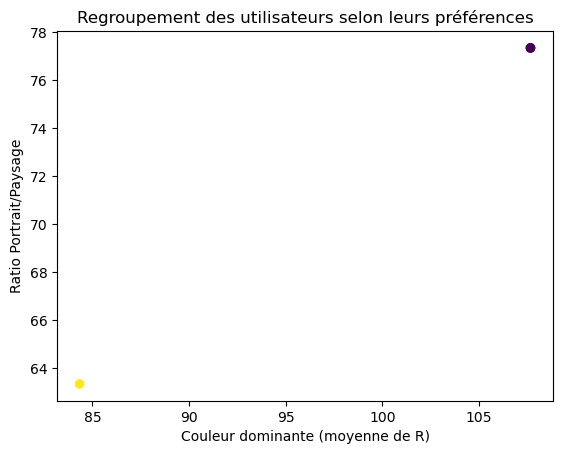

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

# Convertir les préférences en format numérique
user_features = []
user_ids = []

for user, prefs in users_data.items():
    avg_color = np.mean(prefs["preferred_colors"], axis=0)
    orientation_counts = Counter(prefs["preferred_orientation"])
    portrait_ratio = orientation_counts.get("Portrait", 0) / sum(orientation_counts.values())

    user_features.append(list(avg_color) + [portrait_ratio])
    user_ids.append(user)

# Clustering des utilisateurs
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
clusters = kmeans.fit_predict(user_features)

# Associer les utilisateurs aux clusters
user_clusters = {user_ids[i]: clusters[i] for i in range(len(user_ids))}

# Affichage des résultats
for cluster_id in range(num_clusters):
    cluster_members = [user for user, cluster in user_clusters.items() if cluster == cluster_id]
    print(f"🟢 Cluster {cluster_id+1}: {cluster_members}")

# Visualisation des clusters
plt.scatter([f[0] for f in user_features], [f[1] for f in user_features], c=clusters, cmap='viridis')
plt.xlabel("Couleur dominante (moyenne de R)")
plt.ylabel("Ratio Portrait/Paysage")
plt.title("Regroupement des utilisateurs selon leurs préférences")
plt.show()


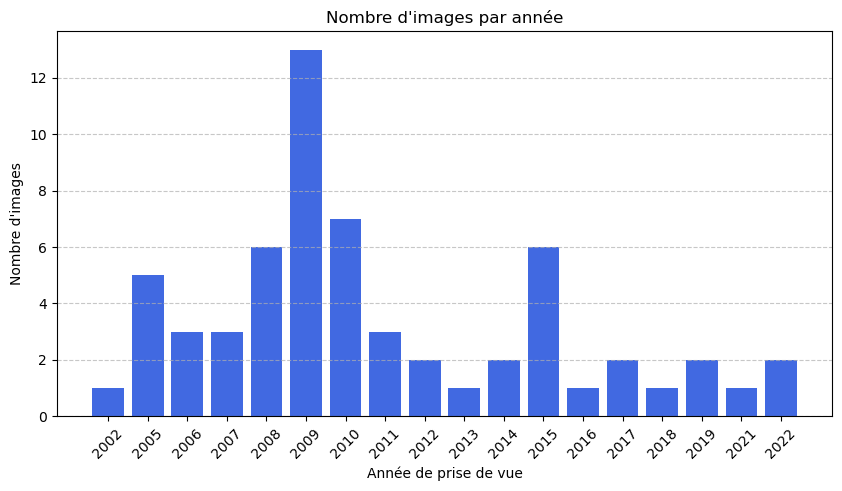

In [44]:
import os
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Chemin du dossier contenant les images
dossier_images = "images"

# Vérifier que le dossier existe
if not os.path.isdir(dossier_images):
    raise ValueError(f"Le dossier '{dossier_images}' n'existe pas.")

# Fonction pour extraire l'année depuis les métadonnées EXIF
def extraire_annee(image_path):
    try:
        with Image.open(image_path) as img:
            exif_data = img._getexif()
            if exif_data:
                date_str = exif_data.get(36867)  # Tag 36867 = DateTimeOriginal
                if date_str:
                    return date_str[:4]  # Extraire uniquement l'année
    except Exception as e:
        print(f"Erreur avec {image_path}: {e}")
    return None

# Lister les images et extraire les années
annees = []
extensions_valides = (".jpg")

for fichier in os.listdir(dossier_images):
    if fichier.lower().endswith(extensions_valides):
        chemin_fichier = os.path.join(dossier_images, fichier)
        annee = extraire_annee(chemin_fichier)
        if annee:
            annees.append(annee)

# Compter le nombre d'images par année
compte_annees = Counter(annees)

# Trier les années par ordre chronologique
annees_triees = sorted(compte_annees.keys())
nb_images = [compte_annees[annee] for annee in annees_triees]

# Tracer le diagramme en bâtons
plt.figure(figsize=(10, 5))
plt.bar(annees_triees, nb_images, color='royalblue')
plt.xlabel("Année de prise de vue")
plt.ylabel("Nombre d'images")
plt.title("Nombre d'images par année")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()


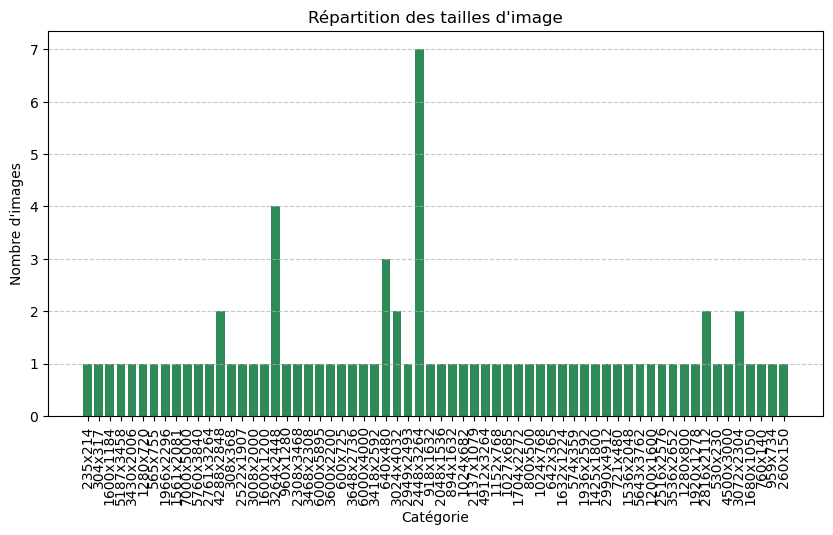

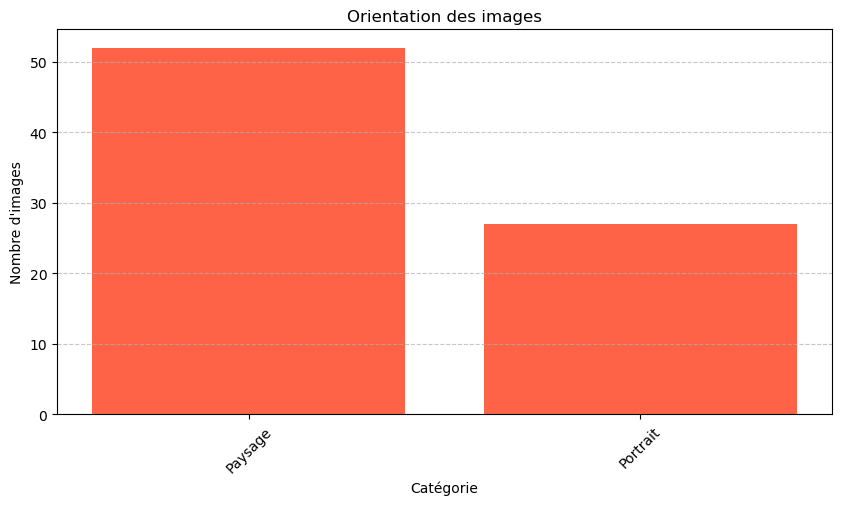

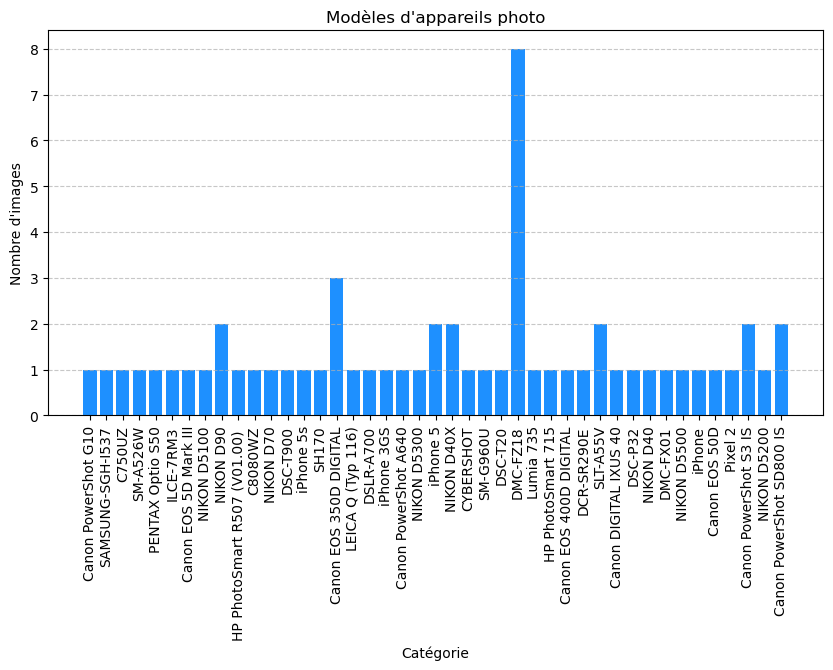

In [48]:
import os
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

# Chemin du dossier contenant les images
dossier_images = "images"

# Vérifier que le dossier existe
if not os.path.isdir(dossier_images):
    raise ValueError(f"Le dossier '{dossier_images}' n'existe pas.")

# Listes pour stocker les informations EXIF
tailles = []
orientations = []
modeles = []

# Fonction pour extraire les informations EXIF
def extraire_infos(image_path):
    try:
        with Image.open(image_path) as img:
            exif_data = img._getexif()
            if exif_data:
                # Taille de l'image
                tailles.append(f"{img.width}x{img.height}")
                
                # Orientation (paysage ou portrait)
                orientation = "Paysage" if img.width >= img.height else "Portrait"
                orientations.append(orientation)

                # Modèle d'appareil photo
                modele = exif_data.get(272)  # Tag 272 = Model
                if modele:
                    modeles.append(modele)
    except Exception as e:
        print(f"Erreur avec {image_path}: {e}")

# Lister les images et extraire les infos
extensions_valides = (".jpg")

for fichier in os.listdir(dossier_images):
    if fichier.lower().endswith(extensions_valides):
        chemin_fichier = os.path.join(dossier_images, fichier)
        extraire_infos(chemin_fichier)

# Compter les occurrences
compte_tailles = Counter(tailles)
compte_orientations = Counter(orientations)
compte_modeles = Counter(modeles)

# Fonction pour tracer un diagramme en bâtons
def tracer_barres(titre, labels, valeurs, couleur="royalblue",angle = 45):
    plt.figure(figsize=(10, 5))
    plt.bar(labels, valeurs, color=couleur)
    plt.xlabel("Catégorie")
    plt.ylabel("Nombre d'images")
    plt.title(titre)
    plt.xticks(rotation=angle)
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

# Tracer les graphiques
tracer_barres("Répartition des tailles d'image", list(compte_tailles.keys()), list(compte_tailles.values()), "seagreen",90)
tracer_barres("Orientation des images", list(compte_orientations.keys()), list(compte_orientations.values()), "tomato",45)
tracer_barres("Modèles d'appareils photo", list(compte_modeles.keys()), list(compte_modeles.values()), "dodgerblue",90)


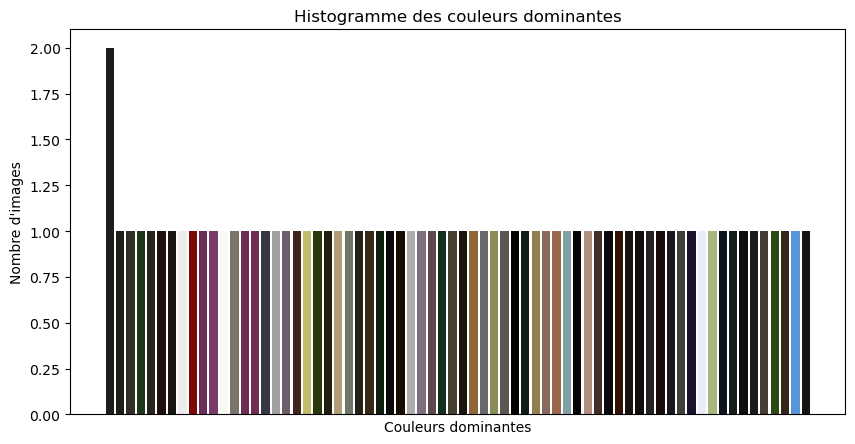

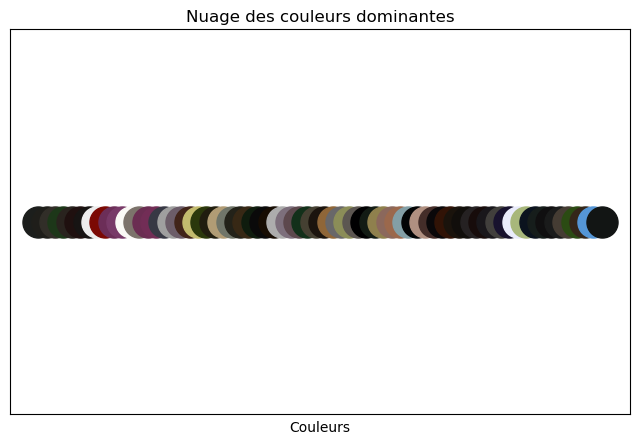

In [50]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 📂 Chemin du fichier JSON
json_file_path = "exif_metadata.json"

# 📖 Charger le JSON mis à jour
with open(json_file_path, "r", encoding="utf-8") as file:
    metadata = json.load(file)

# 📊 1. Histogramme des couleurs dominantes
couleurs_frequences = {}

for img_data in metadata:
    if "dominant_colors" in img_data:
        couleur = tuple(map(int, img_data["dominant_colors"].split()))
        couleurs_frequences[couleur] = couleurs_frequences.get(couleur, 0) + 1

# Trier les couleurs par fréquence
couleurs_triees = sorted(couleurs_frequences.items(), key=lambda x: x[1], reverse=True)

# Extraire les valeurs
couleurs_rgb = [c[0] for c in couleurs_triees]
frequences = [c[1] for c in couleurs_triees]

# Création du graphique en barres
plt.figure(figsize=(10, 5))
plt.bar(range(len(couleurs_rgb)), frequences, color=[np.array(c)/255 for c in couleurs_rgb])
plt.xlabel("Couleurs dominantes")
plt.ylabel("Nombre d'images")
plt.title("Histogramme des couleurs dominantes")
plt.xticks([])
plt.show()

# 📊 2. Nuage de couleurs dominantes
plt.figure(figsize=(8, 5))
for i, couleur in enumerate(couleurs_rgb):
    plt.scatter(i, 1, color=np.array(couleur) / 255, s=500)  # Affiche un cercle coloré

plt.xlabel("Couleurs")
plt.title("Nuage des couleurs dominantes")
plt.yticks([])
plt.xticks([])
plt.show()




✅ Utilisateurs générés avec leurs préférences !
                                         preferred_images  \
User_1  [Freddy%20Pharkas%20Frontier%20Pharmacist.jpg,...   
User_2  [Doom%20Utilities%20%28Front%20Cover%29.jpg, O...   
User_3  [On-Line-Systems-00-Mission-Asteroid.jpg, Doom...   

                                     preferred_colors  \
User_1  [[111, 78, 68], [125, 69, 102], [41, 36, 35]]   
User_2    [[125, 69, 102], [53, 21, 6], [41, 36, 35]]   
User_3   [[41, 36, 35], [125, 69, 102], [87, 85, 67]]   

                preferred_orientation         preferred_tags  
User_1  [Portrait, Paysage, Portrait]        [non, non, try]  
User_2   [Paysage, Paysage, Portrait]       [non, test, try]  
User_3  [Portrait, Paysage, Portrait]  [try, non, try, test]  


User id SVP (User_Nombre): User_2



 Préférences de User_2
Images favorites: ['Doom%20Utilities%20%28Front%20Cover%29.jpg', 'OpenArena-Gargoyle.jpg', 'On-Line-Systems-00-Mission-Asteroid.jpg']
Couleurs dominantes: [[125, 69, 102], [53, 21, 6], [41, 36, 35]]
Orientations: ['Paysage', 'Paysage', 'Portrait']
Tags favoris: ['non', 'test', 'try']


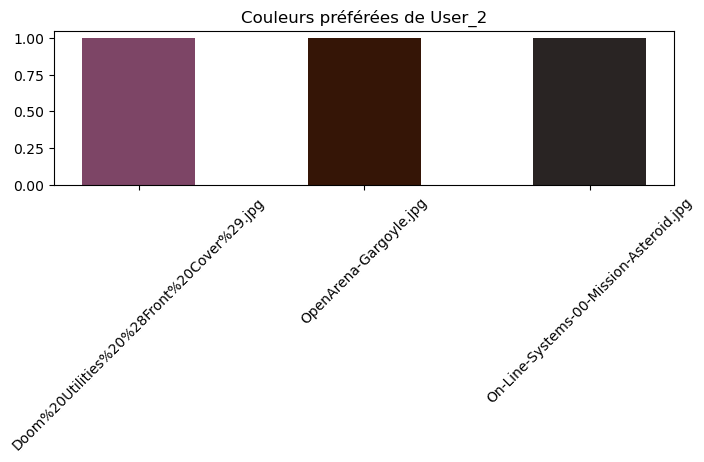

C:\Users\squin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


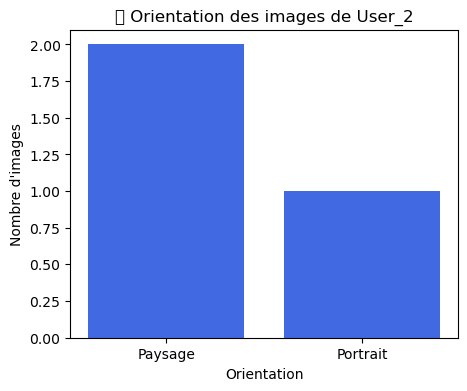

In [56]:
def visualize_user_preferences(user_id, user_data):
    if user_id not in user_data:
        print(f"L'utilisateur {user_id} n'existe pas.")
        return

    user_prefs = user_data[user_id]
    images = user_prefs["preferred_images"]
    colors = user_prefs["preferred_colors"]
    orientations = user_prefs["preferred_orientation"]
    tags = user_prefs["preferred_tags"]

    print(f"\n Préférences de {user_id}")
    print(f"Images favorites: {images}")
    print(f"Couleurs dominantes: {colors}")
    print(f"Orientations: {orientations}")
    print(f"Tags favoris: {tags}")

    # 📊 1. Afficher les couleurs dominantes
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors):
        plt.bar(i, 1, color=np.array(color) / 255, width=0.5)
    plt.xticks(range(len(colors)), images, rotation=45)
    plt.title(f"Couleurs préférées de {user_id}")
    plt.show()

    # 📊 2. Afficher l'orientation des images
    orientation_counts = {o: orientations.count(o) for o in set(orientations)}

    plt.figure(figsize=(5, 4))
    plt.bar(orientation_counts.keys(), orientation_counts.values(), color="royalblue")
    plt.title(f"📏 Orientation des images de {user_id}")
    plt.xlabel("Orientation")
    plt.ylabel("Nombre d'images")
    plt.show()

# 🚀 Générer les utilisateurs fictifs
users_data = generate_users(N_USERS, image_data)

# 📜 Transformer en DataFrame
users_dataframe = pd.DataFrame(users_data).T
print("\n✅ Utilisateurs générés avec leurs préférences !")
print(users_dataframe)

# 🎭 Afficher les préférences d'un utilisateur
visualize_user_preferences(input(f"User id SVP (User_Nombre):"), users_data)

In [61]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random

def calculate_color_distance(color1, color2):
    """ Calcule la distance euclidienne entre deux couleurs RGB """
    return np.linalg.norm(np.array(color1) - np.array(color2))

def find_similar_images(image_name, image_data, top_n=5):
    """ Trouve les images les plus similaires basées sur les couleurs dominantes """
    if image_name not in image_data or "dominant_colors" not in image_data[image_name]:
        return []
    
    target_color = tuple(map(int, image_data[image_name]["dominant_colors"].split()))
    similarities = []
    
    for img, data in image_data.items():
        if img != image_name and "dominant_colors" in data:
            img_color = tuple(map(int, data["dominant_colors"].split()))
            distance = calculate_color_distance(target_color, img_color)
            similarities.append((img, distance))
    
    # Trier par similarité (distance la plus faible)
    similarities.sort(key=lambda x: x[1])
    return [img[0] for img in similarities[:top_n]]

def recommend_images(user_id, users_data, image_data, top_n=3):
    """ Recommande des images basées sur les préférences utilisateur """
    if user_id not in users_data:
        print(f"🚫 L'utilisateur {user_id} n'existe pas.")
        return []
    
    user_prefs = users_data[user_id]
    recommended = set()
    
    # Basé sur les images préférées
    for img in user_prefs["preferred_images"]:
        recommended.update(find_similar_images(img, image_data, top_n))
    
    # Basé sur les tags similaires
    user_tags = set(user_prefs.get("preferred_tags", []))
    for img, data in image_data.items():
        if "tags" in data and any(tag in user_tags for tag in data["tags"]):
            recommended.add(img)
    
    # Retirer les images déjà préférées
    recommended.difference_update(user_prefs["preferred_images"])
    
    return list(recommended)[:top_n]

# Exemple d'utilisation
user_id = "User_3"
recommended_images = recommend_images(user_id, users_data, image_data)
print(f"🎯 Recommandations pour {user_id}: {recommended_images}")


🎯 Recommandations pour User_3: ['OpenArena-Gargoyle.jpg', 'Freddy%20Pharkas%20Frontier%20Pharmacist.jpg']
